# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable

## Authors
- Nicholas Sistovaris
- Moritz Geiger
- Pravalika Myneni
- Sowmya Madala

## External links and resources

All the external data or resources that was not provided by the WDL was acquired through the following links:

1. https://noise-planet.org/noisemodelling.html 
2. https://www.torinocitylab.it/en/asset-to/open-data 
3. https://www.officeholidays.com/countries/italy/turin/2018 
4. https://www.feiertagskalender.ch/index.php?geo=3815&jahr=2018&hl=en
5. http://webgis.arpa.piemonte.it/basicviewer_arpa_webapp/index.html?webmap=89aa175451d24ae0a1911e67957d9aec
6. http://aperto.comune.torino.it/dataset/zone-statistiche
7. https://openweathermap.org/history
8. https://developers.google.com/maps/documentation/places/web-service/details 
9. https://www.cirrusresearch.co.uk/blog/2013/01/noise-data-averaging-how-do-i-average-noise-measurements/

## Introduction

**Overview:**


_from challenge description_
<blockquote>

</blockquote>



**Research:**



## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

In [ ]:
!pip install geopandas
!pip install pmdarima

     |████████████████████████████████| 1.0MB 27.2MB/s 
     |████████████████████████████████| 15.4MB 197kB/s 
     |████████████████████████████████| 6.6MB 38.9MB/s 
     |████████████████████████████████| 1.5MB 31.1MB/s 
     |████████████████████████████████| 9.5MB 34.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


### Imports (libraries) 📚

In [ ]:
## TABULAR
import pandas as pd 
import numpy as np
import matplotlib

## GEO
import geopandas as gpd
import fiona
import folium
from folium.plugins import MarkerCluster, HeatMap, BeautifyIcon
from folium.map import LayerControl, Layer, FeatureGroup
from folium.vector_layers import Circle, CircleMarker
from shapely.geometry import LineString, Point
from shapely import wkt


## DATA
import os
import zipfile
from collections import Counter
import re
from datetime import datetime
import requests
#from dotenv import load_dotenv, find_dotenv
import ast
import datetime as dt
from io import StringIO, BytesIO


## VIS
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa
import branca
import plotly.express as px
import matplotlib.patches as patches

## Feature Selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits

## TIME SERIES
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima 


## MODELLING
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split 

## NEURAL NETWORKS
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Importing Dataframes

Following a first glance at the dataframes provided by the WDL, we believed that using data from **2018** was our best bet to construct our model on. 

- First, we wanted to focus on understanding noise and complaints in the pre-covid context. The years 2020 and 2021 would have been unrepresentative of Turin's nightlife.

- Secondly, we wanted a feature that would represent the number of people outsides on an hourly basis. The data on No. of Visitors based on WiFi was most complete and representative of the population outside. However, it only had data for October, November & December 2018. This is why we picked 2018 for the rest of our data.

In [ ]:
# location of the sensors
df_sensors_def = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/noise_sensor_list.csv', sep=';')
df_sensors_def

,code,address,Lat,Long,streaming
0,s_01,"Via Saluzzo, 26 Torino","45,059172","7,678986",https://userportal.smartdatanet.it/userportal/...
1,s_02,"Via Principe Tommaso, 18bis Torino","45,057837","7,681555",https://userportal.smartdatanet.it/userportal/...
2,s_03,Largo Saluzzo Torino,"45,058518","7,678854",https://userportal.smartdatanet.it/userportal/...
3,s_05,Via Principe Tommaso angolo via Baretti Torino,"45,057603","7,681348",https://userportal.smartdatanet.it/userportal/...
4,s_06,"Corso Marconi, 27 Torino","45,055554","7,68259",https://userportal.smartdatanet.it/userportal/...


**Note** The location of sensors was optimized to cover all
significant feature of “Movida” area:
one in a very crowded square (S_03, not active in
daytime), three in narrow streets with pubs and
bars (S_01, S_04, S_05), one in a boulevard for
traffic noise measurement (S_06) and the last one
in a quieter area with no crowd and low traffic
(S_02), for global reference. The choice of points
of installation was driven also by the power
supply, so light poles, public offices and bike
sharing station where preferred.

Source: https://wdl-data.fra1.digitaloceanspaces.com/torino/120_Euronoise2018.pdf

In [ ]:
df_wifi = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/WIFI%20Count.csv', sep=',')
df_wifi.head()

,Time,No. of Visitors
0,2018-10-24 17:00,47
1,2018-10-24 18:00,155
2,2018-10-24 19:00,181
3,2018-10-24 20:00,211
4,2018-10-24 21:00,239


**Note** As you can see, from the data above, we can get an idea of the number of people outside at different hours.Wifi Information gives a detail idea about the number of visitors outside at a particular hour which has some impact on the noise.

In [ ]:
df_sim_june = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/sim_count/SIM_count_04_100618.csv', sep=';', encoding='latin-1')
df_sim_june.head()

,cluster,data_da,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi)
0,Presenze,2018-06-10T21:00:00Z,2018-06-10T22:00:00Z,3278,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
1,Presenze,2018-06-10T20:00:00Z,2018-06-10T21:00:00Z,3324,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
2,Presenze,2018-06-10T19:00:00Z,2018-06-10T20:00:00Z,3318,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
3,Presenze,2018-06-10T18:00:00Z,2018-06-10T19:00:00Z,3187,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
4,Presenze,2018-06-10T17:00:00Z,2018-06-10T18:00:00Z,2980,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600


In [ ]:
df_sim_jan = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/sim_count/SIM_count_15_210118.csv', sep=';', encoding='latin-1')
df_sim_jan.head()

,cluster,data_da,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi)
0,Presenze,2018-01-21T22:00:00Z,2018-01-21T23:00:00Z,3026,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
1,Presenze,2018-01-21T21:00:00Z,2018-01-21T22:00:00Z,3088,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
2,Presenze,2018-01-21T20:00:00Z,2018-01-21T21:00:00Z,3119,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
3,Presenze,2018-01-21T19:00:00Z,2018-01-21T20:00:00Z,3114,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
4,Presenze,2018-01-21T18:00:00Z,2018-01-21T19:00:00Z,2991,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600


In [ ]:
df_sim_march = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/sim_count/SIM_count_19_250318.csv', sep=';', encoding='latin-1')
df_sim_march.head()

,cluster,data_da,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi)
0,Presenze,2018-03-25T21:00:00Z,2018-03-25T22:00:00Z,3267,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
1,Presenze,2018-03-25T20:00:00Z,2018-03-25T21:00:00Z,3373,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
2,Presenze,2018-03-25T19:00:00Z,2018-03-25T20:00:00Z,3410,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
3,Presenze,2018-03-25T18:00:00Z,2018-03-25T19:00:00Z,3358,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
4,Presenze,2018-03-25T17:00:00Z,2018-03-25T18:00:00Z,3229,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600


In [ ]:
df_sim_all = pd.concat([df_sim_jan, df_sim_march, df_sim_june], axis=0)
df_sim_all.reset_index(inplace=True)
df_sim_all.head()

,index,cluster,data_da,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi)
0,0,Presenze,2018-01-21T22:00:00Z,2018-01-21T23:00:00Z,3026,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
1,1,Presenze,2018-01-21T21:00:00Z,2018-01-21T22:00:00Z,3088,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
2,2,Presenze,2018-01-21T20:00:00Z,2018-01-21T21:00:00Z,3119,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
3,3,Presenze,2018-01-21T19:00:00Z,2018-01-21T20:00:00Z,3114,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
4,4,Presenze,2018-01-21T18:00:00Z,2018-01-21T19:00:00Z,2991,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600


In [ ]:
df_sim_all=df_sim_all.groupby(by='data_a').sum()
df_sim_all.head()

,index,numero_presenze,dettaglio(secondi)
data_a,,,
2018-01-15T00:00:00Z,28710,17827,64800
2018-01-15T01:00:00Z,28692,17640,64800
2018-01-15T02:00:00Z,28674,17476,64800
2018-01-15T03:00:00Z,28656,17340,64800
2018-01-15T04:00:00Z,28638,17215,64800


In [ ]:
df_sim_all=df_sim_all.reset_index()
df_sim_all.head()

,data_a,index,numero_presenze,dettaglio(secondi)
0,2018-01-15T00:00:00Z,28710,17827,64800
1,2018-01-15T01:00:00Z,28692,17640,64800
2,2018-01-15T02:00:00Z,28674,17476,64800
3,2018-01-15T03:00:00Z,28656,17340,64800
4,2018-01-15T04:00:00Z,28638,17215,64800


**Note** Another possibility to estimate the number of people outside at certain hours is the SIM card dataframes. What it highlights is the presence of certain SIM card users at different hours of the day. We have access to SIM card data of 2018 for January, March and June.

In [ ]:
df_noise_2018 = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/noise_data/Noise_Data_2018.csv')
df_noise_2018=df_noise_2018.drop(columns='Unnamed: 0')
df_noise_2018.astype('str')
df_noise_2018.head()

,Data,Ora,C1,C2,C3,C4,C5
0,01-01-2018,00:00,"68,7",NaN,"76,0",NaN,"66,6"
1,01-01-2018,01:00,"68,3",NaN,"68,2",NaN,"65,4"
2,01-01-2018,02:00,"59,8",NaN,"64,4",NaN,"64,4"
3,01-01-2018,03:00,"67,4",NaN,"67,5",NaN,"61,8"
4,01-01-2018,04:00,"68,0",NaN,"64,5",NaN,"60,5"


In [ ]:
df_noise_2018['date_hour'] = df_noise_2018['Data'] + ' ' + df_noise_2018['Ora']
df_noise_2018['date_hour'] = pd.to_datetime(df_noise_2018['date_hour'])
df_noise_2018.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour
0,01-01-2018,00:00,"68,7",NaN,"76,0",NaN,"66,6",2018-01-01 00:00:00
1,01-01-2018,01:00,"68,3",NaN,"68,2",NaN,"65,4",2018-01-01 01:00:00


**Note** The noise data is records of noice measurements using 5 different sensors spread in the San Salvario region on an hourly basis. We will use this data as our target in our time series measurements. 

**Preprocessing Noise Data**


1.   TypeCasting the data values to required format (COnverting data and Ora to Date and Hour format)
2.   Converting the noise readings into decimal format (68,7 to 68.7 etc)
3.   TypeCastig the noise values
4.   Imputing the null values based on day and hour
5.   Considering the logarithmic mean of all noise reading at each day and hour





In [ ]:
#Typecasting the data
df_noise_2018['Ora']=pd.to_datetime(df_noise_2018['Ora']).dt.hour        #Changing the hour format
df_noise_2018['Data']=pd.to_datetime(df_noise_2018['Data'])     #Changing the date format
#Converting the noise readings into decimal format
df_noise_2018['C1']=df_noise_2018['C1'].apply(lambda x: str(x).replace(',','.'))
df_noise_2018['C2']=df_noise_2018['C2'].apply(lambda x: str(x).replace(',','.'))
df_noise_2018['C3']=df_noise_2018['C3'].apply(lambda x: str(x).replace(',','.'))
df_noise_2018['C4']=df_noise_2018['C4'].apply(lambda x: str(x).replace(',','.'))
df_noise_2018['C5']=df_noise_2018['C5'].apply(lambda x: str(x).replace(',','.'))
df_noise_2018.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour
0,2018-01-01,0,68.7,nan,76.0,nan,66.6,2018-01-01 00:00:00
1,2018-01-01,1,68.3,nan,68.2,nan,65.4,2018-01-01 01:00:00


In [ ]:
#Conerting the noise reading to float values
df_noise_2018['C1']=df_noise_2018['C1'].apply(lambda x: float(x))
df_noise_2018['C2']=df_noise_2018['C2'].apply(lambda x: float(x))
df_noise_2018['C3']=df_noise_2018['C3'].apply(lambda x: float(x))
df_noise_2018['C4']=df_noise_2018['C4'].apply(lambda x: float(x))
df_noise_2018['C5']=df_noise_2018['C5'].apply(lambda x: float(x))

In [ ]:
#Adding day value like Monday as 0, Tuseday as 1 etc to the noise data based on date
df_noise_2018['day']=df_noise_2018['Data'].dt.dayofweek

The missing values are filled with respective to particular day and hour. For instance to fill the null value of saturday at 1:00, mean of all the saturdays at 1:00 hour is considered

In [ ]:
#Fillig the null values considering means on hourly basis
df_noise_2018["C1"] = df_noise_2018.groupby(["Ora",'day'])['C1'].transform(lambda x: x.fillna(round(x.mean(),1)))
df_noise_2018["C2"] = df_noise_2018.groupby(["Ora",'day'])['C2'].transform(lambda x: x.fillna(round(x.mean(),1)))
df_noise_2018["C3"] = df_noise_2018.groupby(["Ora",'day'])['C3'].transform(lambda x: x.fillna(round(x.mean(),1)))
df_noise_2018["C4"] = df_noise_2018.groupby(["Ora",'day'])['C4'].transform(lambda x: x.fillna(round(x.mean(),1)))
df_noise_2018["C5"] = df_noise_2018.groupby(["Ora",'day'])['C5'].transform(lambda x: x.fillna(round(x.mean(),1)))
#Let's Check if there are any null values after filling
df_noise_2018.isnull().sum()

Data         0
Ora          0
C1           0
C2           0
C3           0
C4           0
C5           0
date_hour    0
day          0
dtype: int64

Computing logarithimic mean of C1,C2,C3,C4,C5 (all sensors noise readings).

**Why logarithmic mean??**
Simple averaging can be produced will not represent the level of energy of a record. For example, 45, 46, 48, 43, 78, 79, 71, 33, 55 levels, the simple arithmetic average would be 55.3.

But the energy level of noise for 78, 79 and 71 is high compared to other values so this can be solved by considering the logarithmic average.

The steps involved in computing the logarithmic average include

1.   Divide each value by 10
2.   Apply anti log
3.   Add all the values
4.   Divide by total number of samples
5.   base 10 log the number and multiply it by 10




In [ ]:
df_noise_2018['Log_Avg']=np.log10(((10**(df_noise_2018['C1']/10))+(10**(df_noise_2018['C2']/10))+(10**(df_noise_2018['C3']/10))+(10**(df_noise_2018['C4']/10))+(10**(df_noise_2018['C5']/10)))/5)*10
df_noise_2018.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour,day,Log_Avg
0,2018-01-01,0,68.7,56.6,76.0,58.8,66.6,2018-01-01 00:00:00,0,70.253908
1,2018-01-01,1,68.3,53.6,68.2,55.7,65.4,2018-01-01 01:00:00,0,65.424707


In [ ]:
df_complaints = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/complaints_2018.csv')
df_complaints=df_complaints.drop(columns='Unnamed: 0')
df_complaints.head()

,final_date,count_complaint
0,2018-01-01 00:00:00,0.0
1,2018-01-01 01:00:00,0.0
2,2018-01-01 02:00:00,0.0
3,2018-01-01 03:00:00,0.0
4,2018-01-01 04:00:00,0.0


<br><br>
See details in [Appendix](#Weather Data)

In [ ]:
df_weather = pd.read_csv("https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/all_weather.csv")
df_weather = df_weather.drop(columns = ['Unnamed: 0'])
df_weather.head()

,time,temp,winds,rainfall_mm,snowfall_mm
0,2018-01-01 00:00:00,1.04,0.366667,-0.010,2.600000
1,2018-01-01 01:00:00,1.09,0.590000,0.009,2.600000
2,2018-01-01 02:00:00,1.05,0.450000,0.008,2.266667
3,2018-01-01 03:00:00,0.89,0.400000,0.006,2.266667
4,2018-01-01 04:00:00,0.73,0.780000,-0.011,2.300000


In [ ]:
#List of holidays
df_holidays = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/holiday_updated.csv')
df_holidays=df_holidays.drop(columns='Unnamed: 0')
df_holidays.head()

,date_hour,isHoliday,Holiday
0,2018-01-01 00:00:00,1,New year's Day
1,2018-01-01 01:00:00,1,New year's Day
2,2018-01-01 02:00:00,1,New year's Day
3,2018-01-01 03:00:00,1,New year's Day
4,2018-01-01 04:00:00,1,New year's Day


The steps followed for creating the matches data can be seen from **Appendix: Matches Data** part. Due to covid there might be chances of more number of in house matches so we considered both the matches in house as well as the matches in match pad.

In [ ]:
df_matches = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/matches_2018_home.csv')
df_matches=df_matches.drop(columns='Unnamed: 0')
df_matches.head()

,Date,is_match_pad,is_home_pad
0,2018-01-01 00:00:00,0.0,0.0
1,2018-01-01 01:00:00,0.0,0.0
2,2018-01-01 02:00:00,0.0,0.0
3,2018-01-01 03:00:00,0.0,0.0
4,2018-01-01 04:00:00,0.0,0.0


Opening and closing hours of business oragnizations are considered using the Opening Hours Data that we extracted from an API. The Code related to this can be found at **Appendix:Opening Hours Data**.

In [ ]:
df_opening_hours = pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/opening_count_2018.csv')
df_opening_hours=df_opening_hours.drop(columns='Unnamed: 0')
df_opening_hours.head()

,hour,count_close,count_open
0,2018-01-01 00:00:00,66.0,NaN
1,2018-01-01 01:00:00,6.0,NaN
2,2018-01-01 02:00:00,12.0,NaN
3,2018-01-01 03:00:00,6.0,NaN
4,2018-01-01 04:00:00,NaN,NaN


In [ ]:
df_transport=pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/transport_flow.csv')
df_transport.head()

,dat_hr,n,flow_mean,flow_sd,flow_median,speed_mean,speed_sd,speed_median
0,01-01-18 00:00,991,2297.135,1304.423,2085,369.392,135.967,341.945
1,01-01-18 01:00,1163,4479.686,2634.671,4095,341.489,122.820,311.755
2,01-01-18 02:00,965,3796.326,2292.005,3483,328.034,114.294,294.730
3,01-01-18 03:00,949,2777.488,1622.614,2514,322.364,109.699,290.020
4,01-01-18 04:00,1074,1987.818,1166.373,1824,342.330,124.187,311.785


We Merged all the dataframes that we considered which you can refer at Appendix: *Merging Data Frames* section

The datasets we considered include

1. Sensors Data (For Noise Raedings)
2. Wifi Data (For Analysing the no.of. people out side in an hour)
3. Transport Data (For Analysing the effect of cars on noise)
4. Matches Data   (For Analysing how the match days effect the noise, both inhouse and at ground)
5. Police Complaints Data (For Complaints at each hour)
6. Sim Data (For Analysing the presence of people in a particular area at particular hour)
7. Opening and Closing Hours (For taking business times)
8. Holidays Data (For analysing effect of holidays on Noise)
9. Weather Data  (For analysing effect of rainfall and temperature on noise)

In [227]:
#Merged Data Frame
df_final=pd.read_csv('https://raw.githubusercontent.com/McNickSisto/world_data_league/main/stage_final/data/final_df.csv')
df_final.drop(columns=['Unnamed: 0','C1','C2','C3','C4','C5','final_date','index','dat_hr','Day','Holiday'],inplace=True)
df_final.head()

,Ora,date_hour,day,Log_Avg,No. of Visitors,numero_presenze,dettaglio(secondi),temp,winds,rainfall_mm,snowfall_mm,is_match_pad,is_home_pad,count_close,count_open,count_complaint,n,flow_mean,flow_sd,flow_median,speed_mean,speed_sd,speed_median,date,isHoliday
0,0,2018-01-01 00:00:00,0,70.253908,NaN,NaN,NaN,1.04,0.366667,-0.010,2.600000,0.0,0.0,66.0,NaN,0.0,991.0,2297.135,1304.423,2085.0,369.392,135.967,341.945,01-01-18,0
1,1,2018-01-01 01:00:00,0,65.424707,NaN,NaN,NaN,1.09,0.590000,0.009,2.600000,0.0,0.0,6.0,NaN,0.0,1163.0,4479.686,2634.671,4095.0,341.489,122.820,311.755,01-01-18,0
2,2,2018-01-01 02:00:00,0,61.332068,NaN,NaN,NaN,1.05,0.450000,0.008,2.266667,0.0,0.0,12.0,NaN,0.0,965.0,3796.326,2292.005,3483.0,328.034,114.294,294.730,01-01-18,0
3,3,2018-01-01 03:00:00,0,64.069742,NaN,NaN,NaN,0.89,0.400000,0.006,2.266667,0.0,0.0,6.0,NaN,0.0,949.0,2777.488,1622.614,2514.0,322.364,109.699,290.020,01-01-18,0
4,4,2018-01-01 04:00:00,0,63.175181,NaN,NaN,NaN,0.73,0.780000,-0.011,2.300000,0.0,0.0,NaN,NaN,0.0,1074.0,1987.818,1166.373,1824.0,342.330,124.187,311.785,01-01-18,0


# Data Exploration & Feature Selection

## Data Exploration

## Feature Selection

In [228]:
#Checking the propotion of null values in each feature
df_final.isnull().sum().sort_values(ascending=False)/len(df_final)

winds                 0.949543
numero_presenze       0.942580
dettaglio(secondi)    0.942580
No. of Visitors       0.812900
count_open            0.578539
count_close           0.513128
rainfall_mm           0.022374
snowfall_mm           0.022146
flow_median           0.002854
flow_sd               0.002854
flow_mean             0.002854
n                     0.002854
speed_mean            0.002854
speed_sd              0.002854
speed_median          0.002854
count_complaint       0.002626
is_match_pad          0.002626
is_home_pad           0.002626
Log_Avg               0.000000
date_hour             0.000000
day                   0.000000
isHoliday             0.000000
temp                  0.000000
date                  0.000000
Ora                   0.000000
dtype: float64

In [229]:
df_final.drop(columns=['winds','numero_presenze','dettaglio(secondi)','No. of Visitors'],inplace=True)

In [230]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean") # Instanciate a SimpleImputer object with strategy of choice

imputer.fit(df_final[['count_open','count_close','rainfall_mm','snowfall_mm','flow_median','flow_sd','flow_mean','n','speed_mean','speed_sd','speed_median','count_complaint','is_match_pad','is_home_pad']]) # Call the "fit" method on the object

df_final[['count_open','count_close','rainfall_mm','snowfall_mm','flow_median','flow_sd','flow_mean','n','speed_mean','speed_sd','speed_median','count_complaint','is_match_pad','is_home_pad']] = imputer.transform(df_final[['count_open','count_close','rainfall_mm','snowfall_mm','flow_median','flow_sd','flow_mean','n','speed_mean','speed_sd','speed_median','count_complaint','is_match_pad','is_home_pad']]) # Call the "transform" method on the object
imputer.statistics_ # The mean is stored in the transformer's memory

array([2.81408451e+01, 2.43756155e+01, 1.36995303e-02, 1.46451319e+01,
       4.93808517e+03, 3.35830969e+03, 5.56629703e+03, 9.69660332e+02,
       3.49491629e+02, 1.36403073e+02, 3.16182921e+02, 3.51379192e-02,
       1.04383656e-01, 5.21918279e-02])

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ora              8760 non-null   int64  
 1   date_hour        8760 non-null   object 
 2   day              8760 non-null   int64  
 3   Log_Avg          8760 non-null   float64
 4   temp             8760 non-null   float64
 5   rainfall_mm      8760 non-null   float64
 6   snowfall_mm      8760 non-null   float64
 7   is_match_pad     8760 non-null   float64
 8   is_home_pad      8760 non-null   float64
 9   count_close      8760 non-null   float64
 10  count_open       8760 non-null   float64
 11  count_complaint  8760 non-null   float64
 12  n                8760 non-null   float64
 13  flow_mean        8760 non-null   float64
 14  flow_sd          8760 non-null   float64
 15  flow_median      8760 non-null   float64
 16  speed_mean       8760 non-null   float64
 17  speed_sd      

### Forward/backwards stepwise regression (for testing features that contribute best to the final output required)

In [231]:
df_feature_selection = df_final.copy()
X = df_feature_selection.drop(columns=['Log_Avg','date_hour','date'])
y = df_feature_selection['Log_Avg']

In [232]:
## feature importance
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
names=pd.DataFrame(X.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

,0
0,2
1,1
2,5
3,1
4,8
5,1
6,1
7,6
8,9
9,1


In [233]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] < 5] 
print(most_important)

most_important['Rank'].count()

            Feature  Rank
0               Ora     2
1               day     1
3       rainfall_mm     1
5      is_match_pad     1
6       is_home_pad     1
9   count_complaint     1
14       speed_mean     3
16     speed_median     4


8

The top ranked attributes that has greater impact on the noise are hour(time like 1:00,2:00 like that), Day(sunday or monday like that), rainfall_mm, is_match_pad (is the match going on at match pad), is_home_pad (is the match going on at home)

### Univariate Selection

In [234]:
#UNIVARIATE SELECTION
# Feature Extraction with Univariate Statistical Tests (f_regression)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_digits

# load data
names=pd.DataFrame(X.columns)

model = SelectKBest(score_func=f_regression, k=4)
results = model.fit(X, y)

#print (results.scores_)
#print (results.pvalues_)

results_df=pd.DataFrame(results.scores_)
#Concat and name columns
scored=pd.concat([names,results_df], axis=1)
scored.columns = ["Feature", "Score"]
scored.sort_values(by=['Score'],ascending=False)[1:]
#The higher the score, the more important the variable. 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide



,Feature,Score
11,flow_mean,3740.820203
12,flow_sd,3529.063325
15,speed_sd,1314.487768
0,Ora,1314.085796
14,speed_mean,1233.628554
16,speed_median,803.721860
7,count_close,708.338203
1,day,150.151141
4,snowfall_mm,124.834451
9,count_complaint,94.320556


From the univariate selection method we got some more features that effect the noise reading, they include flow_mean,flow_sd,speed_sd, Ora, speed_mean

In [235]:
#Let's Consider only the features having greater impact for modelling
df_model_data=df_final[['is_home_pad','flow_mean','flow_sd','speed_sd','Ora','speed_mean','Log_Avg','day','rainfall_mm','is_match_pad']]
df_model_data.head(4)

,is_home_pad,flow_mean,flow_sd,speed_sd,Ora,speed_mean,Log_Avg,day,rainfall_mm,is_match_pad
0,0.0,2297.135,1304.423,135.967,0,369.392,70.253908,0,-0.010,0.0
1,0.0,4479.686,2634.671,122.820,1,341.489,65.424707,0,0.009,0.0
2,0.0,3796.326,2292.005,114.294,2,328.034,61.332068,0,0.008,0.0
3,0.0,2777.488,1622.614,109.699,3,322.364,64.069742,0,0.006,0.0


## Correlation Analysis

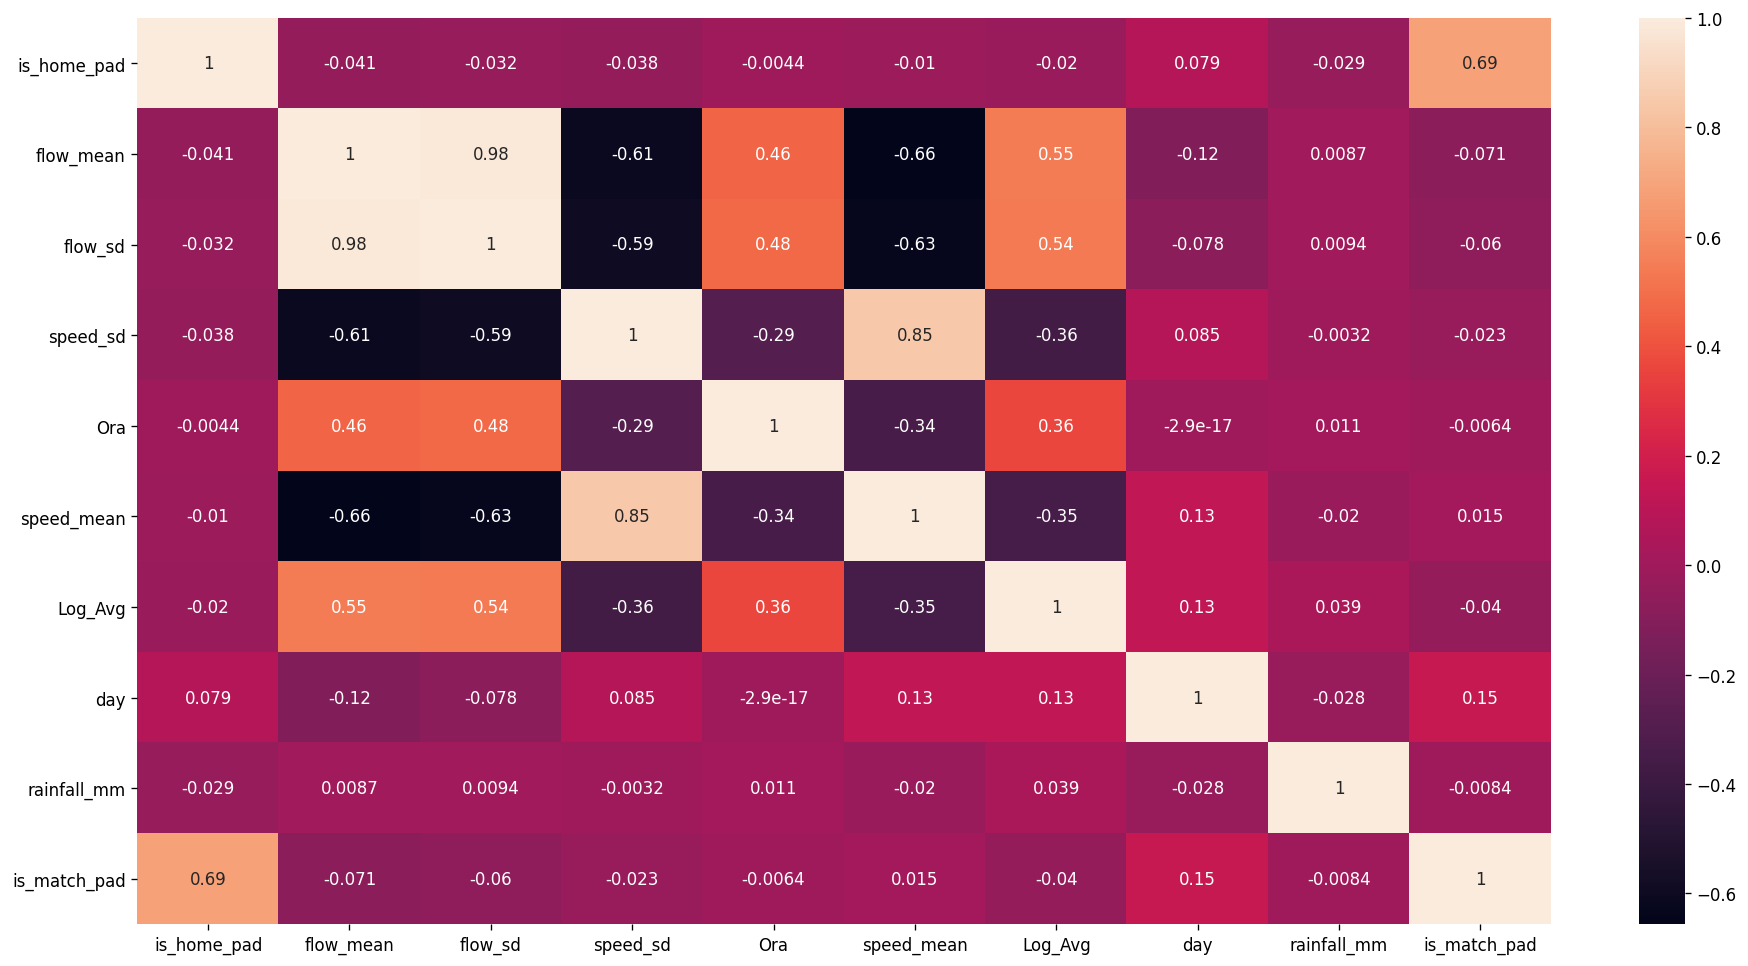

In [237]:
correlation_mat = df_model_data.corr()
f = plt.figure(figsize=(19, 10))
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [238]:
correlation_mat['Log_Avg'].sort_values(ascending=False)

Log_Avg         1.000000
flow_mean       0.547078
flow_sd         0.535927
Ora             0.361204
day             0.129829
rainfall_mm     0.039080
is_home_pad    -0.019889
is_match_pad   -0.039934
speed_mean     -0.351378
speed_sd       -0.361252
Name: Log_Avg, dtype: float64

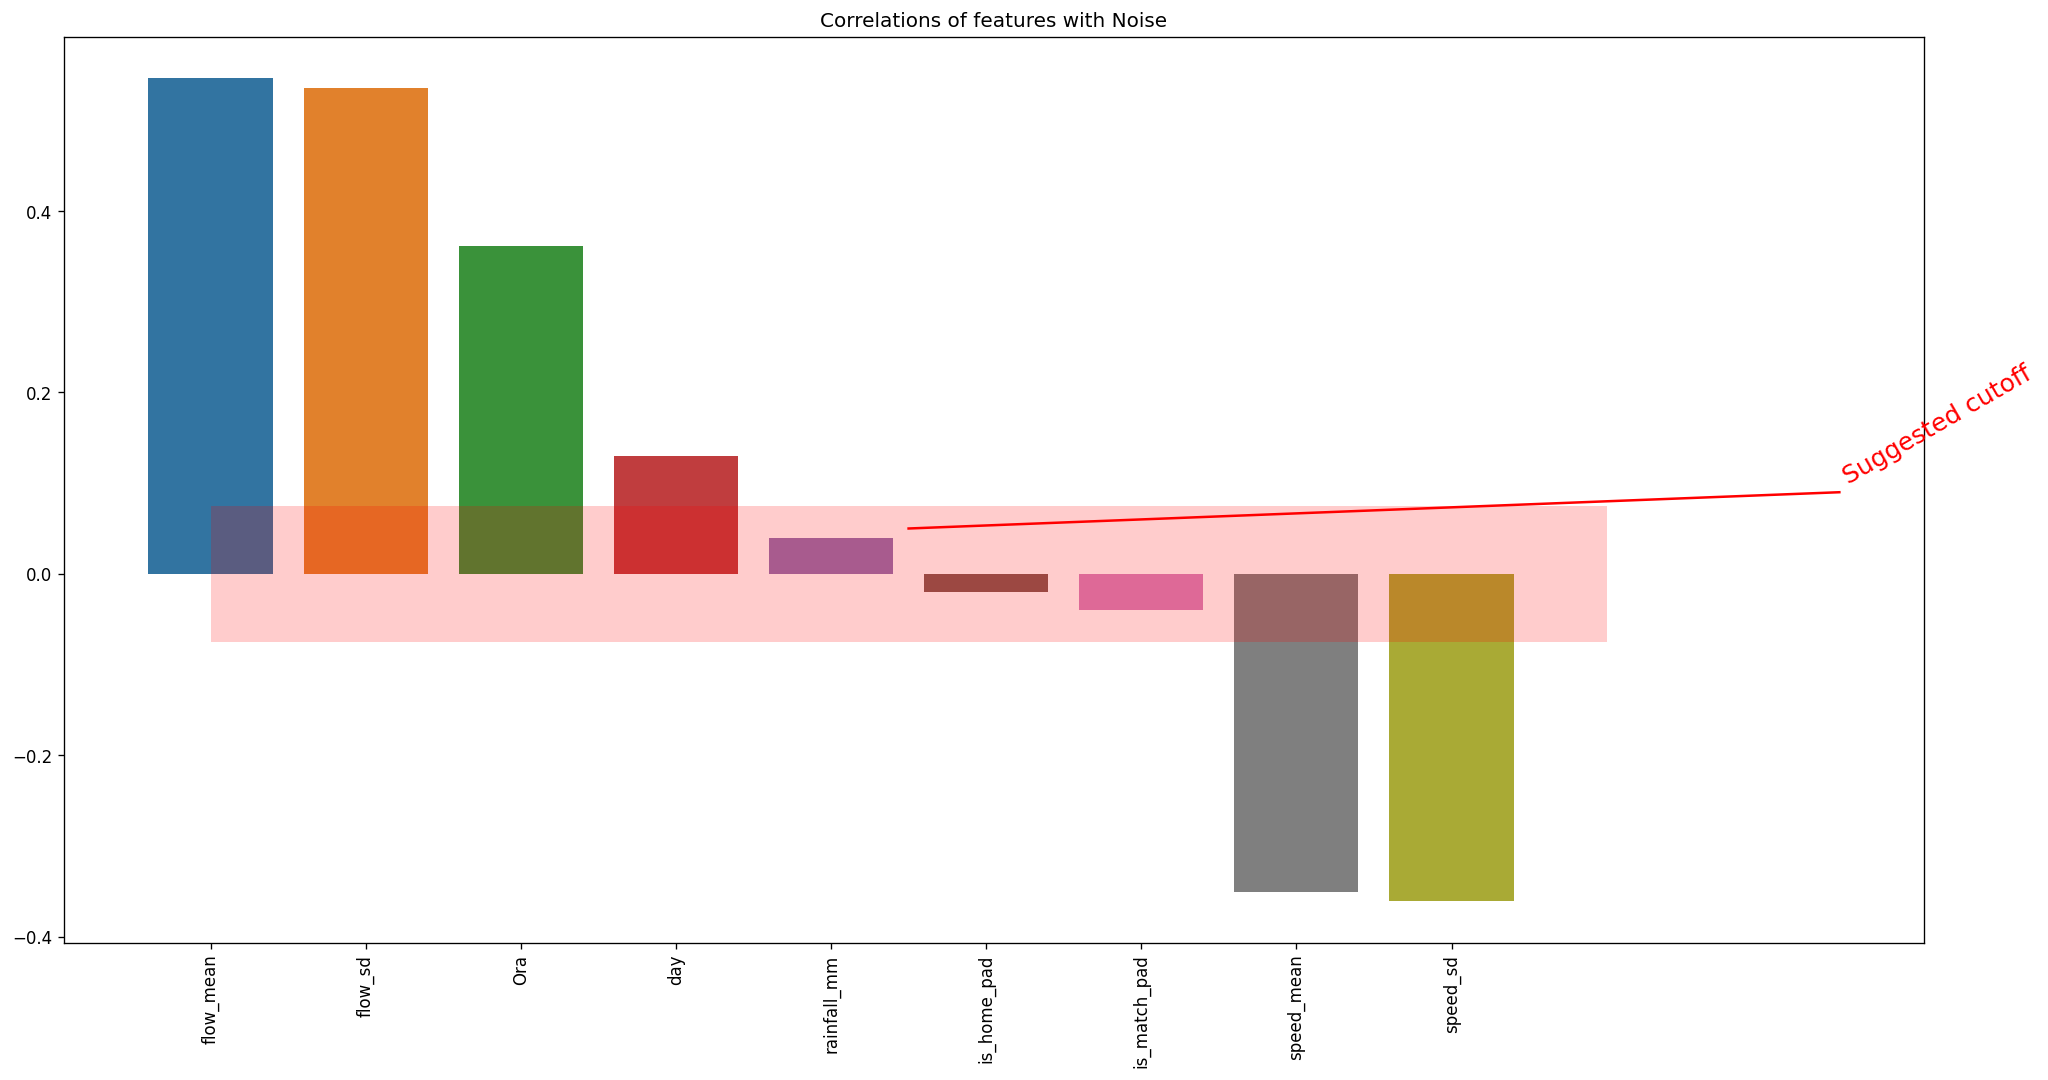

In [239]:
df = df_model_data.copy()

feats = df[[x for x in df.columns if 'feat_' in x]]
corr = df.drop(columns=['Log_Avg']).corrwith(df['Log_Avg'], 
                                              axis=0).sort_values(ascending=False)
plt.figure(figsize=(20,10))
# plot
ax = sns.barplot(x=corr.keys(), y=corr)
plt.xticks(rotation=90)

# rectangle
rect = patches.Rectangle((0, -.075), len(corr), .15, 
                         linewidth=0,  
                         facecolor='r',
                         alpha=.2)
ax.add_patch(rect)
# text
plt.title('Correlations of features with Noise')
plt.text(x=len(corr)/2+6, 
         y=.10, 
         s='Suggested cutoff',
         rotation=30,
         color='r',
         size=15)

# line
plt.plot((len(corr)/2, len(corr)/2+6), 
         (.05, .09),
        c='r')
plt.show()

In [240]:
# perform cutoff within  90 %
column_select = list(corr[~corr.between(-.2, .2)].keys())
column_select.append('Log_Avg')

In [241]:
#List of columns showing better correlation with the noise reading Log_Avg
column_select

['flow_mean', 'flow_sd', 'Ora', 'speed_mean', 'speed_sd', 'Log_Avg']

# Modelling

We considered several models for predicting the noise like regression models, deep learning models,ARIMA etc

We have added the code realted to all the models we used in the **Appendix**

After testing all the models we considered only few that have the greater impact, they include:

1. Baseline Model(Linear Regression)
2. Moving Average
3. ARIMA
4. LSTM

##Final Dataframe Accessing 

Here we are considering the list of columns that we got after applying the univariate selection, forward and backward regression technique and the correlation analysis

In [242]:
data_model=df_model_data[column_select]
data_model.head()

,flow_mean,flow_sd,Ora,speed_mean,speed_sd,Log_Avg
0,2297.135,1304.423,0,369.392,135.967,70.253908
1,4479.686,2634.671,1,341.489,122.820,65.424707
2,3796.326,2292.005,2,328.034,114.294,61.332068
3,2777.488,1622.614,3,322.364,109.699,64.069742
4,1987.818,1166.373,4,342.330,124.187,63.175181


##Modelling

### Getting Log_Avg values of previous times

In [243]:
def create_regressor_attributes(df, attribute, list_of_prev_t_instants) :
    
    list_of_prev_t_instants.sort()
    start = list_of_prev_t_instants[-1] 
    end = len(df)
    df['datetime'] = df.index
    df.reset_index(drop=True)

    df_copy = df[start:end]
    df_copy.reset_index(inplace=True, drop=True)

    for attribute in attribute :
            foobar = pd.DataFrame()

            for prev_t in list_of_prev_t_instants :
                new_col = pd.DataFrame(df[attribute].iloc[(start - prev_t) : (end - prev_t)])
                new_col.reset_index(drop=True, inplace=True)
                new_col.rename(columns={attribute : '{}_(t-{})'.format(attribute, prev_t)}, inplace=True)
                foobar = pd.concat([foobar, new_col], sort=False, axis=1)

            df_copy = pd.concat([df_copy, foobar], sort=False, axis=1)
            
    df_copy.set_index(['datetime'], drop=True, inplace=True)
    return df_copy

In [244]:
list_of_attributes = ['Log_Avg']

list_of_prev_t_instants = []
for i in range(24,361,24): #we can change this list as list of times with most impact
    list_of_prev_t_instants.append(i)

list_of_prev_t_instants

[24, 48, 72, 96, 120, 144, 168, 192, 216, 240, 264, 288, 312, 336, 360]

In [245]:
df_new = create_regressor_attributes(data_model, list_of_attributes, list_of_prev_t_instants)
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,flow_mean,flow_sd,Ora,speed_mean,speed_sd,Log_Avg,Log_Avg_(t-24),Log_Avg_(t-48),Log_Avg_(t-72),Log_Avg_(t-96),Log_Avg_(t-120),Log_Avg_(t-144),Log_Avg_(t-168),Log_Avg_(t-192),Log_Avg_(t-216),Log_Avg_(t-240),Log_Avg_(t-264),Log_Avg_(t-288),Log_Avg_(t-312),Log_Avg_(t-336),Log_Avg_(t-360)
datetime,,,,,,,,,,,,,,,,,,,,,
360,1330.980,821.096,0,373.116,136.018,57.050511,57.278682,70.933958,69.539297,63.268509,59.780889,58.276322,62.883815,60.387011,67.848893,64.186179,58.546722,63.873351,58.710065,57.592027,70.253908
361,689.196,451.331,1,372.645,142.951,54.789326,54.522945,67.852881,68.170848,61.490425,56.953180,56.031218,61.337339,56.538340,65.579769,61.329600,57.279327,61.144561,56.154313,56.422202,65.424707
362,410.238,278.849,2,369.826,141.976,51.700077,51.655626,66.867685,67.163818,59.752370,54.075191,52.611915,59.617503,52.648808,64.692359,63.385807,55.680879,59.315055,58.414597,52.124511,61.332068
363,348.208,227.213,3,367.728,141.275,46.650952,46.925217,63.957624,61.779961,54.991528,49.529880,50.882276,55.340699,49.331401,64.045979,57.786678,51.877137,55.500505,55.128948,49.439248,64.069742
364,525.785,378.296,4,360.650,133.578,48.652227,49.532955,55.721568,55.108920,51.366470,50.932691,53.439118,51.598384,50.141191,59.614982,54.071538,50.725884,50.490680,52.285777,49.730202,63.175181


In [246]:
df_new.corr()['Log_Avg'].sort_values()

speed_sd          -0.362075
speed_mean        -0.351085
Ora                0.361636
Log_Avg_(t-264)    0.473139
Log_Avg_(t-240)    0.474699
Log_Avg_(t-96)     0.476554
Log_Avg_(t-72)     0.476599
Log_Avg_(t-288)    0.502861
Log_Avg_(t-216)    0.504885
Log_Avg_(t-120)    0.509799
Log_Avg_(t-48)     0.510166
flow_sd            0.535892
flow_mean          0.547631
Log_Avg_(t-360)    0.689030
Log_Avg_(t-312)    0.695194
Log_Avg_(t-192)    0.703043
Log_Avg_(t-144)    0.710440
Log_Avg_(t-24)     0.715335
Log_Avg_(t-336)    0.884857
Log_Avg_(t-168)    0.892671
Log_Avg            1.000000
Name: Log_Avg, dtype: float64

####Spliting the dataset into train, validation and test sets

In [247]:
test_set_size = 0.05
valid_set_size= 0.05

df_copy = df_new.reset_index(drop=True)

df_test = df_copy.iloc[ int(np.floor(len(df_copy)*(1-test_set_size))) : ]
df_train_plus_valid = df_copy.iloc[ : int(np.floor(len(df_copy)*(1-test_set_size))) ]

df_train = df_train_plus_valid.iloc[ : int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) ]
df_valid = df_train_plus_valid.iloc[ int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) : ]


X_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]
X_valid, y_valid = df_valid.iloc[:, 1:], df_valid.iloc[:, 0]
X_test, y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]

print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
print('Shape of test inputs, test target:', X_test.shape, y_test.shape)

Shape of training inputs, training target: (7581, 20) (7581,)
Shape of validation inputs, validation target: (399, 20) (399,)
Shape of test inputs, test target: (420, 20) (420,)


### Linear Regression

In [248]:
X = df_new.drop(columns=['Log_Avg'])
y = df_new['Log_Avg']

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [250]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
y_pred = Lin_reg.predict(X_test)
score = r2_score(y_test, y_pred)
print('R-squared score for the test set: ', round(score,4))

R-squared score for the test set:  0.8556


### Moving Average

Moving Average Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes.

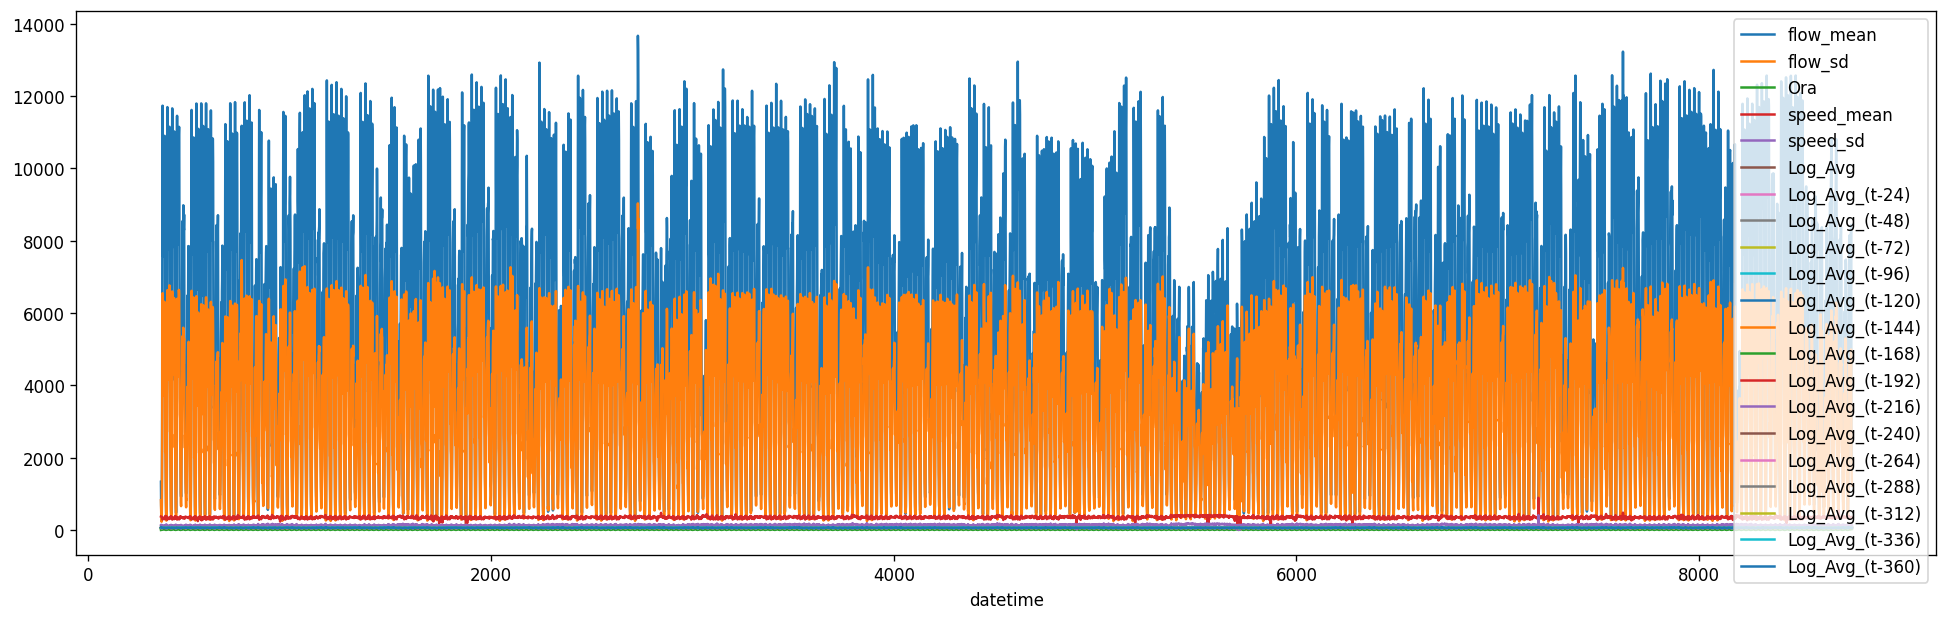

In [251]:
plt.rcParams["figure.figsize"] = (20,6)
df_new.plot()

     flow_mean      flow_sd  Ora  speed_mean    speed_sd    Log_Avg  datetime
2  3524.382333  2077.033000  1.0  346.305000  124.360333  65.670228       1.0
3  3684.500000  2183.096667  2.0  330.629000  115.604333  63.608839       2.0
4  2853.877333  1693.664000  3.0  330.909333  116.060000  62.858997       3.0
5  2041.229667  1189.952333  4.0  336.971333  120.632667  60.999306       4.0
6  1525.357333   916.519667  5.0  348.819000  130.338667  58.275637       5.0


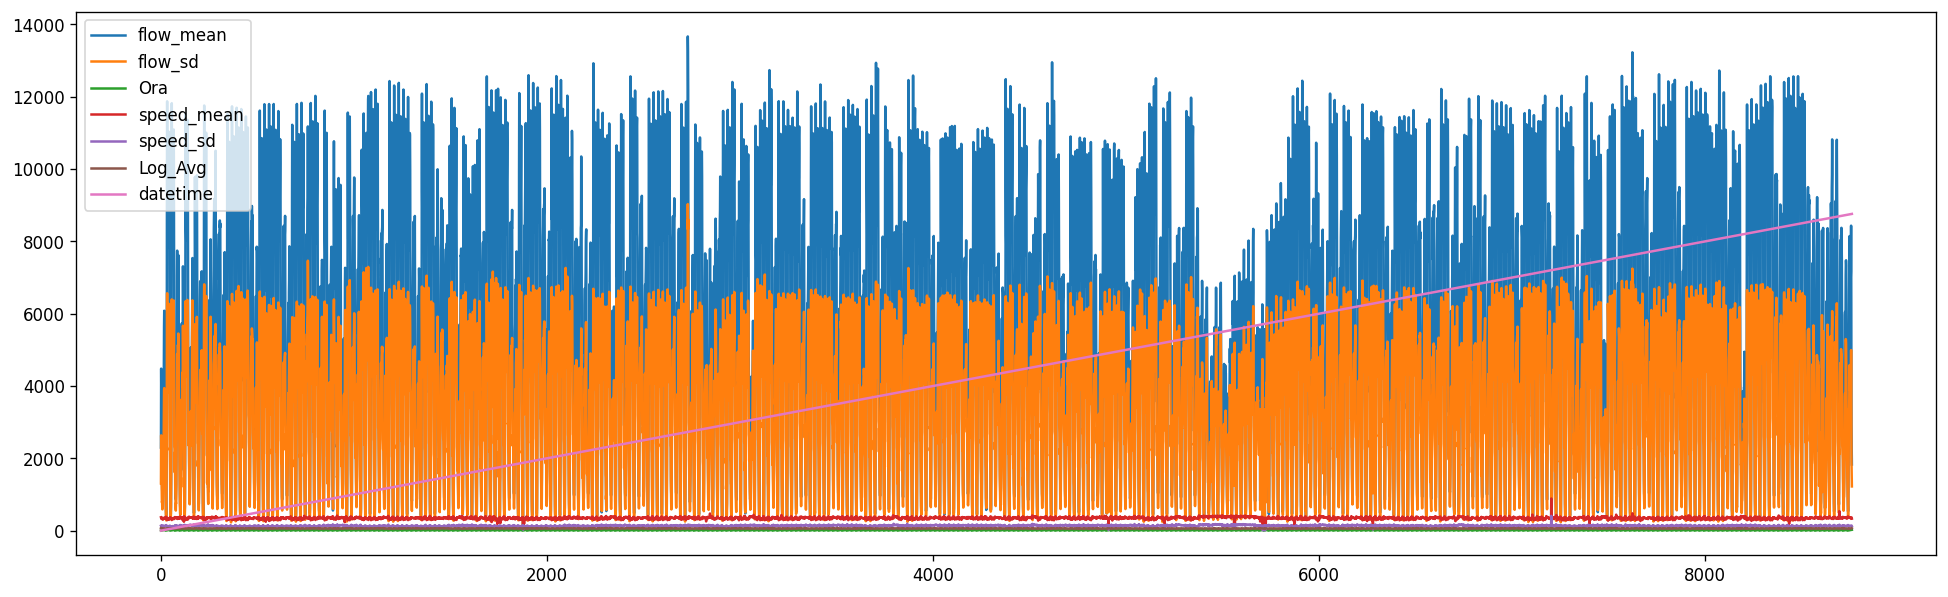

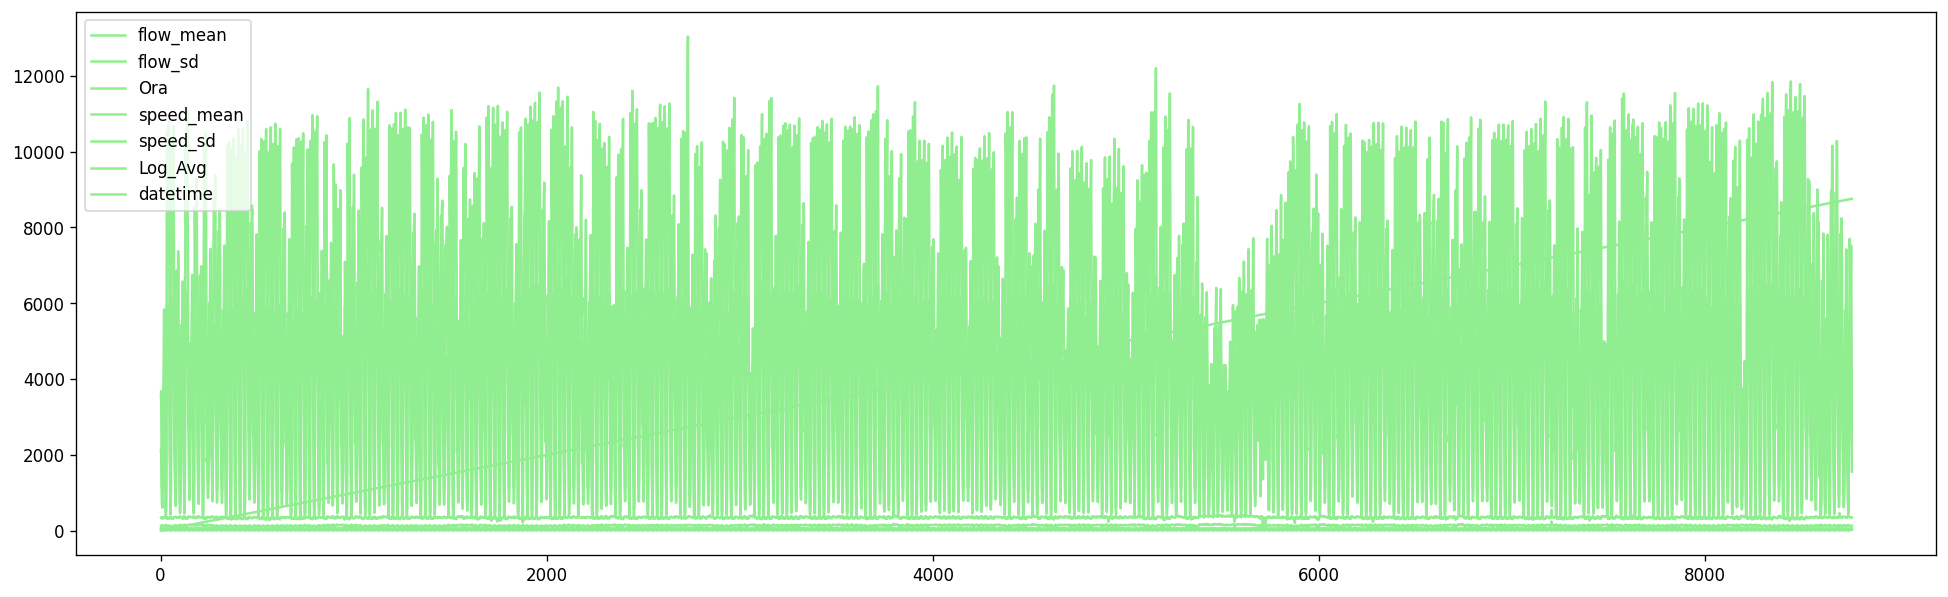

In [252]:
# Tail-rolling average transform
rolling = data_model.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.dropna(inplace= True)
print(rolling_mean.head())
# plot original and transformed dataset
data_model.plot()
rolling_mean.plot(color='lightgreen')

Test MSE: 17.794


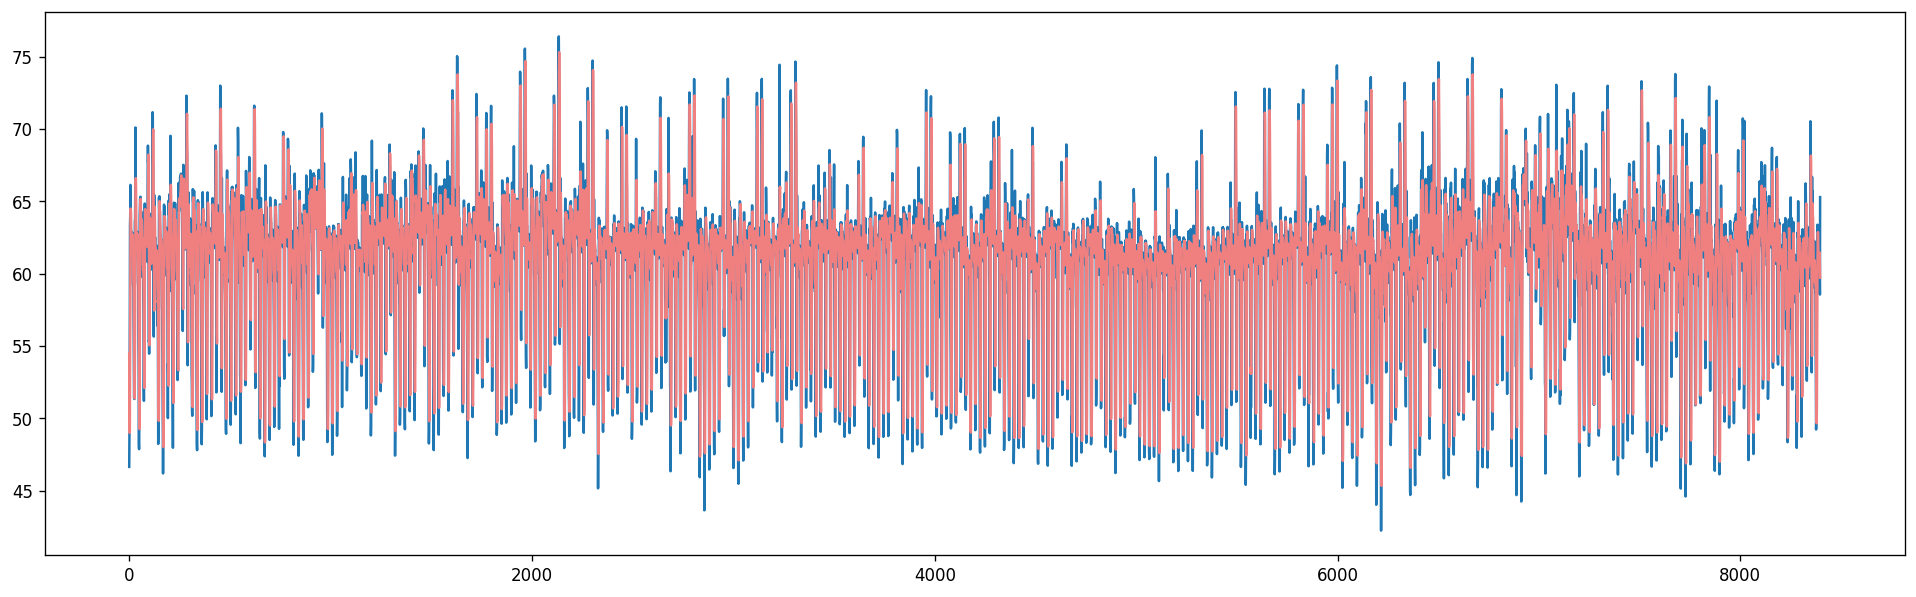

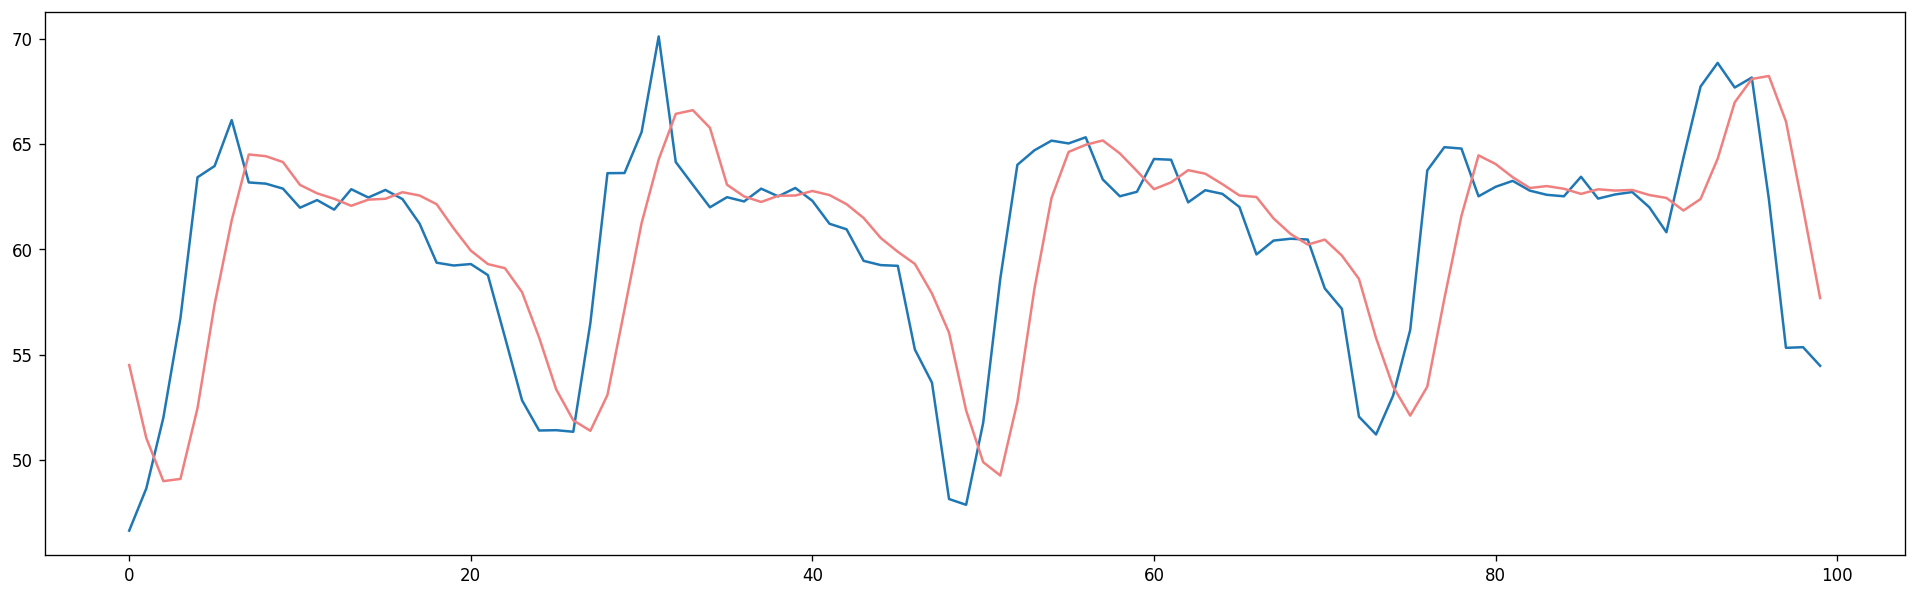

In [253]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = df_new['Log_Avg'].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='lightcoral')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='lightcoral')
pyplot.show()

# Appendix

## Weather Data

### Data

In [ ]:
weather = pd.read_csv('raw_data/weather/weather_1.csv',
#                       nrows=1000, #rm later
                      sep=';',
#                       decimal=',',
                      skiprows=4,
#                       parse_dates=[[0, 1]],
#                       dayfirst=True,
                      header=0,
                      names=['date', 'hour', 'rainfall_mm', 'snowfall_mm'],
                     )

# workaround for hour concat issue
weather['date'] = pd.to_datetime(weather['date'], format='%d-%m-%Y', errors='coerce')
weather['date_hour'] = weather.apply(lambda x: pd.to_datetime(str(x.date) + ' ' + str(x.hour), errors='coerce'), axis=1)

# workaround for decimal issue
weather['rainfall_mm'] = weather.rainfall_mm.apply(lambda x: str(x).replace(',','.'))
weather['snowfall_mm'] = weather.snowfall_mm.apply(lambda x: str(x).replace(',','.'))

In [ ]:
weather2 = pd.read_csv('raw_data/weather/weather_2.csv', 
                 sep=';', 
                 skiprows=4, 
                 header=0, 
#                  decimal=',',
#                 converters={2:lambda x: x.replace(',', '.')},
#                 parse_dates=[[0, 1]],
                names=['date', 'hour', 'winds'],
                na_values={2:'',
                            3:''},
                dayfirst=True,
                )
# workaround for hour concat issue
weather2['date'] = pd.to_datetime(weather2['date'], format='%d-%m-%Y', errors='coerce')
weather2['date_hour'] = weather2.apply(lambda x: pd.to_datetime(str(x.date) + ' ' + str(x.hour), errors='coerce'), axis=1)

weather2['winds'] = weather2.winds.apply(lambda x: str(x).replace(',','.'))

In [ ]:
# weather['date_hour'] = pd.to_datetime(weather['date_hour'], errors='coerce')
weather_1 = weather.dropna(subset=['date_hour'])

# weather2['date_hour'] = pd.to_datetime(weather2['date_hour'], errors='coerce')
weather_2 = weather2.dropna(subset=['date_hour'])

In [ ]:
merged_weather = weather_2.merge(weather_1,
                                right_on='date_hour',
                                left_on='date_hour',
                                )

In [ ]:
merged_weather.sort_values(by='date_hour').tail()
merged_weather['hourly_date'] = merged_weather.date_hour.apply(lambda x: x.floor('h'))

In [ ]:
merged_weather = merged_weather.astype({'winds': float,
                      'rainfall_mm':float,
                      'snowfall_mm':float})

In [ ]:
hourly_weather = merged_weather.groupby('hourly_date').mean()

In [ ]:
hourly_weather.info()

In [ ]:
hourly_weather.to_csv('hourly_weather.csv')

In [ ]:
hourly_weather.head()

### Open Weather Map

In [ ]:
# API KEY
load_dotenv(find_dotenv())
OWM_API = os.environ.get("OWM_API")

In [ ]:
# init time range
range_2019 = pd.DataFrame(pd.date_range('2016-06-01', '2021-06-12', freq='h'), columns=['hour'])
range_2019.tail().hour

In [ ]:
req = 'http://history.openweathermap.org/data/2.5/history/wdl'
start = range_2019.hour.min().value
inter = range_2019.hour.max().value
end = range_2019.hour.max().value
# tail1 = tail.min().value
# tail2 = tail.max().value
params = {
    'id':'3165524', # ID of Turin
    'type':'hour',
    'start':str(start)[:10], # unix time
    'end':str(end)[:10],
    'appid': OWM_API
}

r = requests.get(req, params=params)


# with open('data/weather.txt', 'w') as outfile:
#     json.dump(r.json(), outfile)
    
weather = r.json()
lst = weather.get('list')
dct = {x.get('dt'):x.get('weather')[0].get('main') for x in lst}
weather_df = pd.DataFrame.from_dict(dct, 
                                    orient='index', 
                                    columns=['weather']).reset_index().rename(columns={'index':'time'})
weather_df['rain'] = weather_df.weather == 'Rain'

In [ ]:
lst = weather.get('list')
dct = {x.get('dt'):x.get('main').get('temp') for x in lst}

In [ ]:
weather_df = pd.DataFrame.from_dict(dct, 
                                    orient='index', 
                                    columns=['temp']).reset_index().rename(columns={'index':'time'})
weather_df['temp'] = weather_df.temp-273.15
weather_df['time'] = pd.to_datetime(weather_df.time, unit='s')

In [ ]:
merge_all = weather_df.merge(hourly_weather, left_on='time', right_index=True)

In [ ]:
merge_all.to_csv('all_weather.csv')

## Matches Data

In [ ]:
# API KEY
load_dotenv(find_dotenv())
FOOTBALL = os.environ.get("FOOTBALL")

In [ ]:
# headers = {'X-Auth-Token': FOOTBALL}
# url = 'https://api.football-data.org/v2/matches'
# params = {'dateFrom': '2018-04-14',
#          'dateTo': '2018-04-16'}
# r = requests.get(url, headers=headers, params=params)
# r.json()

In [ ]:
root = 'raw_data/football/'
dfs = []
for i in os.listdir(root):
    if '.csv' in i:
        df = pd.read_csv(root+i)
        dfs.append(df)

In [ ]:
# filter all by juve
juve1 = dfs[0][(dfs[0]['HomeTeam'] == 'Juventus') \
              | (dfs[0]['AwayTeam'] == 'Juventus')]['Date']
juve1 = pd.to_datetime(juve1, format='%d/%m/%Y')

juve2 = dfs[1][(dfs[1]['Home Team'] == 'Juventus') \
               | (dfs[1]['Away Team'] == 'Juventus')]['Date']
juve2 = pd.to_datetime(juve2.apply(lambda x: x[:10]), format="%d/%m/%Y")

juve3 = dfs[2][(dfs[2]['HomeTeam'] == 'Juventus') \
              | (dfs[2]['AwayTeam'] == 'Juventus')]['Date']
juve3 = pd.to_datetime(juve3, format='%d/%m/%y')

juve4 = dfs[3][(dfs[3]['Home Team'] == 'Juventus') \
               | (dfs[3]['Away Team'] == 'Juventus')]['Date']
juve4 = pd.to_datetime(juve4.apply(lambda x: x[:10]), format="%d/%m/%Y")

In [ ]:
# concat all dates
all_concat = pd.DataFrame(pd.concat([juve1, juve2, juve3, juve4]))
# all_concat['Date'] = pd.to_datetime(all_concat.Date)
all_concat['is_match'] = 1

In [ ]:
all_concat.sort_values(by='Date')

In [ ]:
# get all 2018 matches
all_concat_2018 = all_concat[(all_concat.Date > '01-01-2018') \
                            & (all_concat.Date < '2018-12-31')]

In [ ]:
# put in 2018 time series
r = pd.date_range('2018-01-01', '2018-12-31', freq='h')
matches = all_concat_2018.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [ ]:
matches.head()

In [ ]:
matches.to_csv('raw_data/football/matches_2018.csv')

## Opening Hours Data

This part is a bit messy, so we will explain: 
We used the ```nearbysearch``` [Link](https://developers.google.com/maps/documentation/places/web-service/search#PlaceSearchRequests) to get all the ```bars``` and ```restaurants``` business hours. 

Then we fetch the unique id ```reference``` from the list of businesses and run it through the ```place_details``` API [Link](https://developers.google.com/maps/documentation/places/web-service/details)

From there we extract all the ```open``` (time-)elements and ```close``` (time-)elements and stack them in a dataframe divided by days of the week (0-6). 

In the end we merge the findings with an empty time series of 2018 with an 'hourly' sequence. 


In [ ]:
# API KEY
load_dotenv(find_dotenv())
GOOGLE = os.environ.get("GOOGLE")

In [ ]:
# first find all bars

url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json'
params = {            
            'location':'45.05917,7.67899', #sensor
            'radius':'200',
            'type':'restaurant',
            'key':GOOGLE,
            'next_page_token':'Aap_uED24ODLIlOhPdAHG7xFrCg_OrsQ_jAruvTm3QSG4Qbnp5Q85Aa4K7ar-QgnGI7Xnl1epc9YIEj17piMfVpFUxQysBwi8XTzdWbtl6IBGKTKQwV_kxhaAUWr8JG6XVo-BVKHd8NJUwiTP-_uQvkKxc5vLZ4-v6T8ZBuS42zw5DE1L2KgNPCbm86EsPhPYOj8L1MXTRdEm_GhmQSdOt8nDxG4gKkbxiXvmHNTmuBLavqN-VrbpkRBBoVZz_t2P53_ShPgndMEwlt55EYlZHCYK2gHymy9WJjMjKn3VzS6CfcTQJ-TjgsxsrRjSqNXV4T5i2qusSJ__gsam11RBY8XRADB31i-ec_wYCh1529gNKKy9tdQbidVaQjAI72wQ-7yzTZXGzxpz8ob_DHkdVdyJLxijWoHqsXY7oQM-W3Db0u08SHwaooMyb3Da9Ij'
         } 

r = requests.get(url, params=params)
r.json()

In [ ]:
results = r.json().get('results')
results2 = r.json().get('results')
results3 = r.json().get('results')
results4 = r.json().get('results')
results5 = r.json().get('results')
results6 = r.json().get('results')

In [ ]:
bars = results + results2 + results3 + results4 + results5 + results6
restaurants = results + results2 + results3 + results4 + results5 + results6
len(restaurants)

In [ ]:
# get specific opening hrs from fetched bars/restaurants
url = 'https://maps.googleapis.com/maps/api/place/details/json'
params = {
    'key':GOOGLE,
    'fields':'opening_hours'
         }
opening_hrs = []
for bar in restaurants:
    reference = bar.get('reference')
    params['place_id'] = reference
    r = requests.get(url, params=params)
    opening_hrs.append(r)

In [ ]:
contents_hrs = [r.json() for r in opening_hrs]
periods = []
for x in contents_hrs:
    try:
        hr = x.get('result').get('opening_hours').get('periods')
        periods.append(hr)
    except:
        pass

In [ ]:
# remove 24h open bars
new = [x for x in periods if len(x) > 1]

In [ ]:
closing = []
for x in new:
    for i in x:
        _close = i.get('close')
        closing.append(_close)
opening = []
for x in new:
    for i in x:
        _open = i.get('open')
        opening.append(_open)

In [ ]:
opening_times_rest = pd.DataFrame(opening)
closing_times_rest = pd.DataFrame(closing)
closing_times_rest['time'] = pd.to_datetime(closing_times_rest['time'], format='%H%M')
opening_times_rest['time'] = pd.to_datetime(opening_times_rest['time'], format='%H%M')
closing_times_rest['day'] = closing_times_rest.day.apply(lambda x: x-1 if x != 0 else 6)
opening_times_rest['day'] = opening_times_rest.day.apply(lambda x: x-1 if x != 0 else 6)

In [ ]:
# create unique day_hr identifier
closing_times_rest['day_time'] = closing_times_rest.apply(lambda x: str(x.day) + '_' + str(x.time.hour), axis=1)
opening_times_rest['day_time'] = opening_times_rest.apply(lambda x: str(x.day) + '_' + str(x.time.hour), axis=1)

In [ ]:
# put results in dataframe
opening_times = pd.DataFrame(opening)
closing_times = pd.DataFrame(closing)
closing_times['time'] = pd.to_datetime(closing_times['time'], format='%H%M')
opening_times['time'] = pd.to_datetime(opening_times['time'], format='%H%M')
closing_times['day'] = closing_times.day.apply(lambda x: x-1 if x != 0 else 6)
opening_times['day'] = opening_times.day.apply(lambda x: x-1 if x != 0 else 6)

In [ ]:
# create unique day_hr identifier
closing_times['day_time'] = closing_times.apply(lambda x: str(x.day) + '_' + str(x.time.hour), axis=1)
opening_times['day_time'] = opening_times.apply(lambda x: str(x.day) + '_' + str(x.time.hour), axis=1)

In [ ]:
closing_all = pd.concat([closing_times_rest, closing_times])
opening_all = pd.concat([opening_times_rest, opening_times])

In [ ]:
# count all apperances of openings and closings per weekday
agg_close = closing_all.groupby('day_time').agg({'day':'count'}).rename(columns={'day':'count_close'})
agg_open = opening_all.groupby('day_time').agg({'day':'count'}).rename(columns={'day':'count_open'})
agg_joint = agg_close.join(agg_open, how='outer')

In [ ]:
# init range 2018
range_2018 = pd.DataFrame(pd.date_range('2018-01-01', '2018-12-31', freq='h'), columns=['hour'])
range_2018['day_time'] =  range_2018.apply(lambda x: str(x.hour.weekday()) + '_' + str(x.hour.hour), axis=1)

In [ ]:
# join both

opening_count_2018 = range_2018.merge(agg_joint, 
                                    on='day_time',
                                    how='left').drop(columns='day_time')

In [ ]:
opening_times

In [ ]:
opening_count_2018.sort_values(by='count_open')

In [ ]:
opening_count_2018.to_csv('raw_data/opening_count_2018.csv')

## Merging Dataframes

In [ ]:
df_noise_2018['date_hour'] = df_noise_2018['date_hour'].dt.strftime("%d-%m-%y %H:%M")
df_noise_2018.head()

,Data,Ora,C1,C2,C3,C4,C5,date_hour,day,Log_Avg
0,2018-01-01,0,68.7,56.6,76.0,58.8,66.6,01-01-18 00:00,0,70.253908
1,2018-01-01,1,68.3,53.6,68.2,55.7,65.4,01-01-18 01:00,0,65.424707
2,2018-01-01,2,59.8,51.2,64.4,53.0,64.4,01-01-18 02:00,0,61.332068
3,2018-01-01,3,67.4,47.5,67.5,48.7,61.8,01-01-18 03:00,0,64.069742
4,2018-01-01,4,68.0,47.6,64.5,49.0,60.5,01-01-18 04:00,0,63.175181


In [ ]:
df_wifi.rename(columns = {'Time': 'date_time'}, inplace=True)
df_wifi.columns

Index(['date_time', 'No. of Visitors'], dtype='object')

In [ ]:
df_wifi['date_time'] = pd.to_datetime(df_wifi['date_time'])
df_wifi['date_time'] = df_wifi['date_time'].dt.strftime("%d-%m-%y %H:%M")

In [ ]:
df_weather['time'] = pd.to_datetime(df_weather['time'])
df_weather['time'] = df_weather['time'].dt.strftime("%d-%m-%y %H:%M")

In [ ]:
for x, line in enumerate(df_sim_all['data_a']):
    df_sim_all['data_a'][x] = line[8:10] + line[4:7] + '-' + line[0:4] +' ' + line[11:16]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_sim_all.rename(columns= {'data_a' : 'date_time'}, inplace=True)
df_sim_all.columns

Index(['date_time', 'index', 'numero_presenze', 'dettaglio(secondi)'], dtype='object')

In [ ]:
df_sim_all['date_time'] = pd.to_datetime(df_sim_all['date_time'])
df_sim_all['date_time'] = df_sim_all['date_time'].dt.strftime("%d-%m-%y %H:%M")
df_sim_all.head(2)

,date_time,index,numero_presenze,dettaglio(secondi)
0,15-01-18 00:00,28710,17827,64800
1,15-01-18 01:00,28692,17640,64800


In [ ]:
df_opening_hours.rename(columns= {'hour' : 'date_time'}, inplace=True)
df_opening_hours['date_time'] = pd.to_datetime(df_opening_hours['date_time'])
df_opening_hours['date_time'] = df_opening_hours['date_time'].dt.strftime("%d-%m-%y %H:%M")
df_opening_hours.head(2)

,date_time,count_close,count_open
0,01-01-18 00:00,66.0,NaN
1,01-01-18 01:00,6.0,NaN


In [ ]:
df_matches.rename(columns= {'Date' : 'date_time'}, inplace=True)
df_matches['date_time'] = pd.to_datetime(df_matches['date_time'])
df_matches['date_time'] = df_matches['date_time'].dt.strftime("%d-%m-%y %H:%M")
df_matches.head(2)

,date_time,is_match_pad,is_home_pad
0,01-01-18 00:00,0.0,0.0
1,01-01-18 01:00,0.0,0.0


In [ ]:
df_complaints['final_date'] = pd.to_datetime(df_complaints['final_date'])
df_complaints['final_date'] = df_complaints['final_date'].dt.strftime("%d-%m-%y %H:%M")

In [ ]:
df_holidays['date_hour']= pd.to_datetime(df_holidays['date_hour'])
df_holidays['date_hour'] = df_holidays['date_hour'].dt.strftime("%d-%m-%y %H:%M")
df_holidays.head()

,date_hour,isHoliday,Holiday
0,01-01-18 00:00,1,New year's Day
1,01-01-18 01:00,1,New year's Day
2,01-01-18 02:00,1,New year's Day
3,01-01-18 03:00,1,New year's Day
4,01-01-18 04:00,1,New year's Day


Merging noise, wifi, sim,weather,... police complaints

In [ ]:
df_final = df_noise_2018.merge(df_wifi, left_on= 'date_hour', right_on= 'date_time', how='left')
df_final.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour,day,Log_Avg,date_time,No. of Visitors
0,2018-01-01,0,68.7,56.6,76.0,58.8,66.6,01-01-18 00:00,0,70.253908,NaN,NaN
1,2018-01-01,1,68.3,53.6,68.2,55.7,65.4,01-01-18 01:00,0,65.424707,NaN,NaN


In [ ]:
df_final_1 = df_final.merge(df_sim_all, left_on= 'date_hour', right_on= 'date_time', how='left')
df_final_1.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour,day,Log_Avg,date_time_x,No. of Visitors,date_time_y,index,numero_presenze,dettaglio(secondi)
0,2018-01-01,0,68.7,56.6,76.0,58.8,66.6,01-01-18 00:00,0,70.253908,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,1,68.3,53.6,68.2,55.7,65.4,01-01-18 01:00,0,65.424707,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_final_2 = df_final_1.merge(df_weather, left_on= 'date_hour', right_on= 'time', how='left')
df_final_2.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour,day,Log_Avg,date_time_x,No. of Visitors,date_time_y,index,numero_presenze,dettaglio(secondi),time,temp,winds,rainfall_mm,snowfall_mm
0,2018-01-01,0,68.7,56.6,76.0,58.8,66.6,01-01-18 00:00,0,70.253908,NaN,NaN,NaN,NaN,NaN,NaN,01-01-18 00:00,1.04,0.366667,-0.010,2.6
1,2018-01-01,1,68.3,53.6,68.2,55.7,65.4,01-01-18 01:00,0,65.424707,NaN,NaN,NaN,NaN,NaN,NaN,01-01-18 01:00,1.09,0.590000,0.009,2.6


In [ ]:
df_final_3 = df_final_2.merge(df_matches, left_on= 'date_hour', right_on= 'date_time', how='left')
df_final_3.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour,day,Log_Avg,date_time_x,No. of Visitors,date_time_y,index,numero_presenze,dettaglio(secondi),time,temp,winds,rainfall_mm,snowfall_mm,date_time,is_match_pad,is_home_pad
0,2018-01-01,0,68.7,56.6,76.0,58.8,66.6,01-01-18 00:00,0,70.253908,NaN,NaN,NaN,NaN,NaN,NaN,01-01-18 00:00,1.04,0.366667,-0.010,2.6,01-01-18 00:00,0.0,0.0
1,2018-01-01,1,68.3,53.6,68.2,55.7,65.4,01-01-18 01:00,0,65.424707,NaN,NaN,NaN,NaN,NaN,NaN,01-01-18 01:00,1.09,0.590000,0.009,2.6,01-01-18 01:00,0.0,0.0


In [ ]:
df_final_4 = df_final_3.merge(df_opening_hours, left_on= 'date_hour', right_on= 'date_time', how='left')

In [ ]:
df_final_4.columns

Index(['Data', 'Ora', 'C1', 'C2', 'C3', 'C4', 'C5', 'date_hour', 'day',
       'Log_Avg', 'date_time_x', 'No. of Visitors', 'date_time_y', 'index',
       'numero_presenze', 'dettaglio(secondi)', 'time', 'temp', 'winds',
       'rainfall_mm', 'snowfall_mm', 'date_time_x', 'is_match_pad',
       'is_home_pad', 'date_time_y', 'count_close', 'count_open'],
      dtype='object')

In [ ]:
df_final_5=df_final_4.merge(df_complaints, left_on='date_hour', right_on = 'final_date', how ="left")
df_final_5.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour,day,Log_Avg,date_time_x,No. of Visitors,date_time_y,index,numero_presenze,dettaglio(secondi),time,temp,winds,rainfall_mm,snowfall_mm,date_time_x,is_match_pad,is_home_pad,date_time_y,count_close,count_open,final_date,count_complaint
0,2018-01-01,0,68.7,56.6,76.0,58.8,66.6,01-01-18 00:00,0,70.253908,NaN,NaN,NaN,NaN,NaN,NaN,01-01-18 00:00,1.04,0.366667,-0.010,2.6,01-01-18 00:00,0.0,0.0,01-01-18 00:00,66.0,NaN,01-01-18 00:00,0.0
1,2018-01-01,1,68.3,53.6,68.2,55.7,65.4,01-01-18 01:00,0,65.424707,NaN,NaN,NaN,NaN,NaN,NaN,01-01-18 01:00,1.09,0.590000,0.009,2.6,01-01-18 01:00,0.0,0.0,01-01-18 01:00,6.0,NaN,01-01-18 01:00,0.0


In [ ]:
df_final_6=df_final_5.merge(df_transport, left_on='date_hour', right_on = 'dat_hr', how ="left")
df_final_6.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour,day,Log_Avg,date_time_x,No. of Visitors,date_time_y,index,numero_presenze,dettaglio(secondi),time,temp,winds,rainfall_mm,snowfall_mm,date_time_x,is_match_pad,is_home_pad,date_time_y,count_close,count_open,final_date,count_complaint,dat_hr,n,flow_mean,flow_sd,flow_median,speed_mean,speed_sd,speed_median
0,2018-01-01,0,68.7,56.6,76.0,58.8,66.6,01-01-18 00:00,0,70.253908,NaN,NaN,NaN,NaN,NaN,NaN,01-01-18 00:00,1.04,0.366667,-0.010,2.6,01-01-18 00:00,0.0,0.0,01-01-18 00:00,66.0,NaN,01-01-18 00:00,0.0,01-01-18 00:00,991.0,2297.135,1304.423,2085.0,369.392,135.967,341.945
1,2018-01-01,1,68.3,53.6,68.2,55.7,65.4,01-01-18 01:00,0,65.424707,NaN,NaN,NaN,NaN,NaN,NaN,01-01-18 01:00,1.09,0.590000,0.009,2.6,01-01-18 01:00,0.0,0.0,01-01-18 01:00,6.0,NaN,01-01-18 01:00,0.0,01-01-18 01:00,1163.0,4479.686,2634.671,4095.0,341.489,122.820,311.755


In [ ]:
df_final_7 = df_final_6.drop(columns = ['date_time_x','date_time_y', 'time'] )

In [ ]:
df_final_7['date_hour'] = pd.to_datetime(df_final_7['date_hour'])
df_final_7['date'] = df_final_7['date_hour'].dt.strftime("%d-%m-%y")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_final_7.head(2)

,Data,Ora,C1,C2,C3,C4,C5,date_hour,day,Log_Avg,No. of Visitors,index,numero_presenze,dettaglio(secondi),temp,winds,rainfall_mm,snowfall_mm,is_match_pad,is_home_pad,count_close,count_open,final_date,count_complaint,dat_hr,n,flow_mean,flow_sd,flow_median,speed_mean,speed_sd,speed_median,date
0,2018-01-01,0,68.7,56.6,76.0,58.8,66.6,2018-01-01 00:00:00,0,70.253908,NaN,NaN,NaN,NaN,1.04,0.366667,-0.010,2.6,0.0,0.0,66.0,NaN,01-01-18 00:00,0.0,01-01-18 00:00,991.0,2297.135,1304.423,2085.0,369.392,135.967,341.945,01-01-18
1,2018-01-01,1,68.3,53.6,68.2,55.7,65.4,2018-01-01 01:00:00,0,65.424707,NaN,NaN,NaN,NaN,1.09,0.590000,0.009,2.6,0.0,0.0,6.0,NaN,01-01-18 01:00,0.0,01-01-18 01:00,1163.0,4479.686,2634.671,4095.0,341.489,122.820,311.755,01-01-18


In [ ]:
df_finalized = df_final_7.merge(df_holidays, left_on='final_date', right_on = 'date_hour', how ="left")
#df_finalized['isHoliday'] = df_finalized['Holiday'].apply(lambda x: 0 if pd.isnull(x)==True else 1)
df_finalized.sample(4)

,Data,Ora,C1,C2,C3,C4,C5,date_hour_x,day,Log_Avg,No. of Visitors,index,numero_presenze,dettaglio(secondi),temp,winds,rainfall_mm,snowfall_mm,is_match_pad,is_home_pad,count_close,count_open,final_date,count_complaint,dat_hr,n,flow_mean,flow_sd,flow_median,speed_mean,speed_sd,speed_median,date,date_hour_y,isHoliday,Holiday
1894,2018-01-18,13,60.7,62.9,61.1,62.5,64.4,2018-01-18 13:00:00,3,62.526346,NaN,27180.0,19537.0,64800.0,8.26,1.52,-0.003,9.366667,0.0,0.0,NaN,NaN,18-01-18 13:00,0.0,18-01-18 13:00,1099.0,7867.440,4537.972,7029.0,337.554,123.179,311.115,18-01-18,18-01-18 13:00,0.0,NaN
10548,2018-06-06,14,60.3,60.1,61.7,62.0,64.3,2018-06-06 14:00:00,2,61.959189,NaN,27576.0,20591.0,64800.0,20.76,NaN,-0.013,25.133333,0.0,0.0,36.0,NaN,06-06-18 14:00,0.0,06-06-18 14:00,1038.0,8848.885,5101.341,8070.0,344.483,138.537,307.380,06-06-18,06-06-18 14:00,0.0,NaN
7294,2018-03-24,21,62.6,59.9,67.8,65.0,61.7,2018-03-24 21:00:00,5,64.302015,NaN,26001.0,24294.0,64800.0,5.99,NaN,0.000,7.900000,0.0,0.0,6.0,NaN,24-03-18 21:00,0.0,24-03-18 21:00,1087.0,5124.968,3043.525,4539.0,365.115,130.151,334.160,24-03-18,24-03-18 21:00,0.0,NaN
1517,2018-01-17,16,62.6,62.8,60.3,63.1,64.6,2018-01-17 16:00:00,2,62.888057,NaN,27558.0,19557.0,64800.0,8.17,3.13,0.003,9.033333,0.0,0.0,NaN,NaN,17-01-18 16:00,0.0,17-01-18 16:00,1063.0,9497.356,5385.025,8496.0,319.182,116.537,295.105,17-01-18,17-01-18 16:00,0.0,NaN


In [ ]:
df_finalized = df_finalized.drop(columns= ['Data','Date'])

In [ ]:
df_finalized.columns

Index(['Ora', 'C1', 'C2', 'C3', 'C4', 'C5', 'date_hour', 'day', 'Log_Avg',
       'No. of Visitors', 'index', 'numero_presenze', 'dettaglio(secondi)',
       'temp', 'winds', 'rainfall_mm', 'snowfall_mm', 'is_match_pad',
       'is_home_pad', 'count_close', 'count_open', 'final_date',
       'count_complaint', 'dat_hr', 'n', 'flow_mean', 'flow_sd', 'flow_median',
       'speed_mean', 'speed_sd', 'speed_median', 'date', 'Day', 'Holiday',
       'isHoliday'],
      dtype='object')

In [ ]:
df_finalized.to_csv('Final_df.csv')

## Modelling

## LSTM

### Preprocessing for LSTM RNN

In [ ]:
X_train_lstm = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1) )
y_train_lstm = np.reshape(y_train, (y_train.shape[0]))

X_valid_lstm = np.reshape(X_valid,(X_valid.shape[0], X_valid.shape[1],1) )
y_valid_lstm = np.reshape(y_valid, (y_valid.shape[0]))

X_test_lstm = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1) )
y_test_lstm = np.reshape(y_test_scaled, (y_test.shape[0]))


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

In [ ]:
model.fit(x=X_train_lstm, y=y_train_lstm, batch_size=5, epochs=30, verbose=1, validation_data=(X_valid_lstm, y_valid_lstm), shuffle=True)

In [ ]:
loss_per_epoch = model.history.history['loss']
val_loss_per_epoch = model.history.history['val_loss']

In [ ]:
y_pred = model.predict(X_test_lstm)
y_pred_rescaled = Target_scaler.inverse_transform(y_pred)
y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
score = r2_score(y_test_rescaled, y_pred_rescaled)